It is necessary to clone the repository for the whole exercise to work.

In [897]:
!git clone https://github.com/AlejandroNunezArroyo/VisionTest.git

fatal: destination path 'VisionTest' already exists and is not an empty directory.


# Exercise 1

For exercise 1 we will apply the histogram seen in class, which is calculated based on the number of bits and also the number of values in the image. 

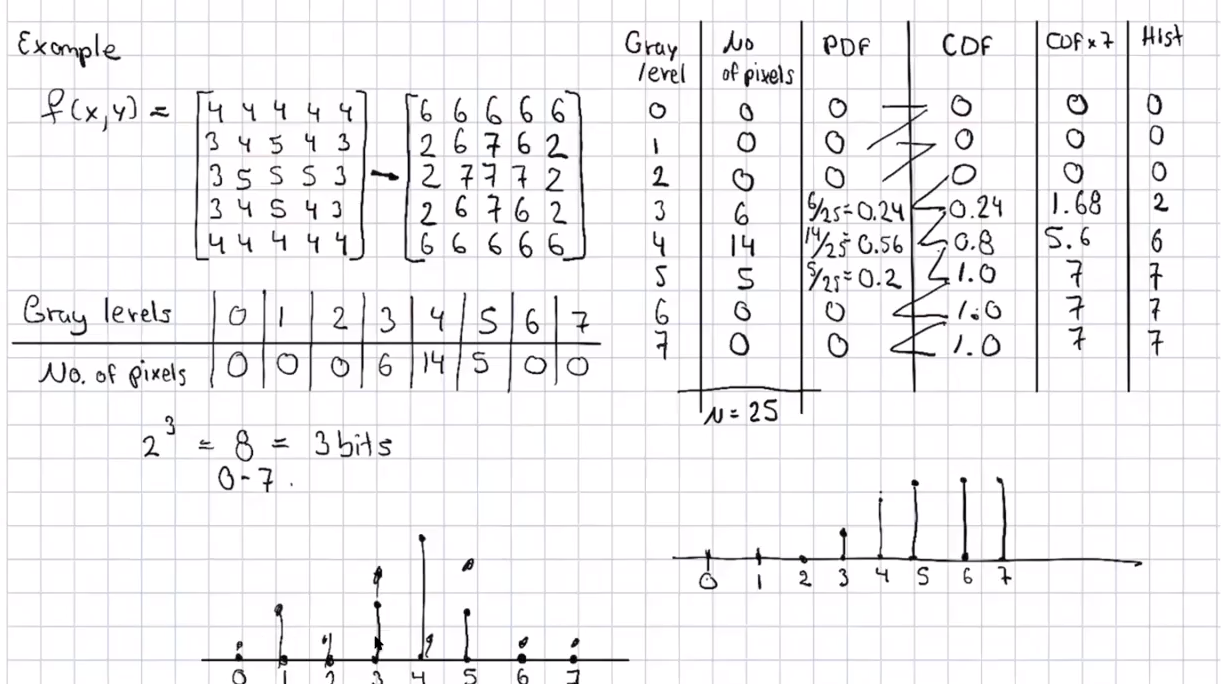

## Import of libraries

In [898]:
import cv2
image = cv2.imread('VisionTest/ObjectDetection/Frame1.png')
im1 = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)

In [899]:
import numpy as np
import matplotlib.pyplot as plt

s_1 = image

In [900]:
maxElement = np.amax(s_1)
maxElement
bits = 1

## Calculate bit levels

In [901]:
while True:
  if (pow(2, bits)<maxElement):
    # print(pow(2, bits))
    bits += 1
  else:
    break

In [902]:
print("Number of bits", bits, "Levels: ", pow(2, bits))

Number of bits 8 Levels:  256


In [903]:
gray_levels = np.arange(pow(2, bits))
counter_levels = np.arange(pow(2.0, bits))

## Counting picture elements and assignment

In [904]:
c = 0
anterior = 0
pdf = 0
aux = 0.0
for x in range(pow(2, bits)):
  result = np.count_nonzero(s_1 == x)
  c = c + result
  # print(result)

for x in range(pow(2, bits)):
  result = np.count_nonzero(s_1 == x)
  pdf = (result/c)+anterior
  aux = pdf * 7
  # print(aux)
  anterior = pdf
  counter_levels[x] = aux
  aux = 0

In [905]:
# print(gray_levels)
# print(counter_levels)

## Bit-level substitution of quantized elements

In [906]:
val = 0.0
j = 0
for x in range(pow(2, bits)):
  while True:
    if (gray_levels[j]>=counter_levels[x]):
      val = gray_levels[j]
      break
    j += 1
      # print(gray_levels[j])
  counter_levels[x] = val
  # print(counter_levels[x])

## Result: Quantified cumulative distribution function at bit level (Own result)

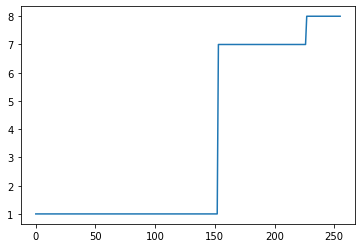

In [907]:
# plt.scatter(gray_levels, counter_levels)
plt.plot(gray_levels, counter_levels)

# Exercise 2

The code for this section was obtained from the following web page. 
[Reference](https://unipython.com/ecualizacion-de-histogramas/)

## Cumulative distribution function

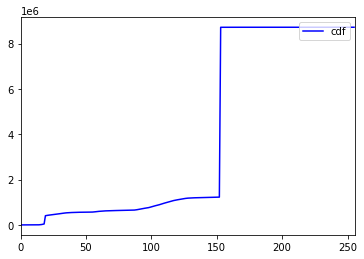

In [908]:
#Genera el historama de la imagen
hist,bins = np.histogram(s_1.flatten(),256,[0,256])
 
#Genera la función de distribución acumulada (cdf por sus siglas en inglés)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
 
#Genera los gráficos del histograma y de la función de distribución acumulada
plt.plot(cdf_normalized, color = 'b')
# plt.hist(s_1.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histograma'), loc = 'upper right')
plt.show()

## Conclusions between the function created and the one obtained from the Internet

In the first part the Cumulative distribution function was obtained manually by bit levels, that is why it reaches up to 8 on the y-axis, on the other hand, the scale of the x-axis is shown continuous in a value from 0 to 256. 
The obtained graph is similar to the code that was recovered to obtain the Cumulative distribution function directly from the image, the difference is the resolution in the "y" axis since the function works with all pixels directly, that is why you can see a more attenuated image unlike the one created manually that is only quantified at the level of 8 bits. 
The graph in both is similar and shows a general behavior, the biggest difference is the resolution between them, the manual one works in function of bots and the function recovered from the internet with the whole image. 

# Exercise 3

We load the images of our dataset

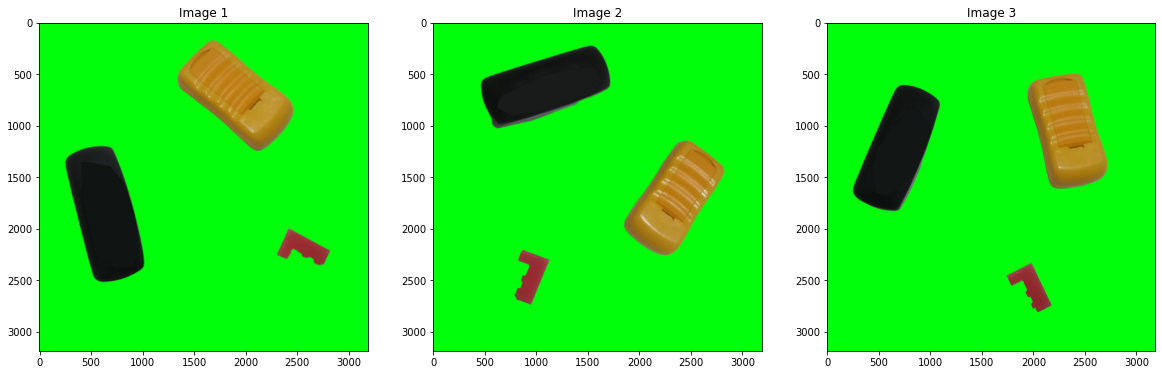

In [909]:
import matplotlib.pyplot as plt

import numpy as np
import cv2
import os

%matplotlib inline

img1 = cv2.imread('VisionTest/ObjectDetection/Frame1.png')
img2 = cv2.imread('VisionTest/ObjectDetection/Frame2.png')
img3 = cv2.imread('VisionTest/ObjectDetection/Frame3.png')

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)

plot_images(img1, img2, img3)

Image plotting function

In [910]:
def plot_images(mask, mask2, mask3):
  f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))
  ax1.set_title('Image 1')
  ax1.imshow(mask, cmap='gray')
  ax2.set_title('Image 2')
  ax2.imshow(mask2, cmap='gray')
  ax3.set_title('Image 3')
  ax3.imshow(mask3, cmap='gray')

Mask plotting function

In [911]:
def plot_mask(obj_mask1, obj_mask2, obj_mask3):
  masked_image1 = np.copy(img1)
  masked_image2 = np.copy(img2)
  masked_image3 = np.copy(img3)

  masked_image1[obj_mask1 != 255] = [255, 255, 255]
  masked_image2[obj_mask2 != 255] = [255, 255, 255]
  masked_image3[obj_mask3 != 255] = [255, 255, 255]

  # plt.imshow(masked_image1, cmap='gray')

  f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))
  ax1.set_title('Image 1')
  ax1.imshow(masked_image1, cmap='gray')
  ax2.set_title('Image 2')
  ax2.imshow(masked_image2, cmap='gray')
  ax3.set_title('Image 3')
  ax3.imshow(masked_image3, cmap='gray')

Masks object 1

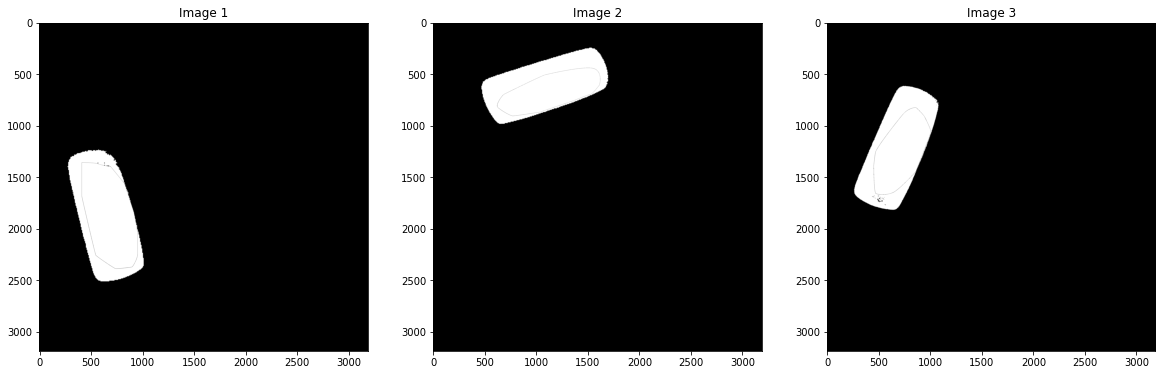

In [912]:
lower_obj1 = np.array([10,10,10]) 
upper_obj1 = np.array([34,38,37])

obj1_mask1 = cv2.inRange(img1, lower_obj1, upper_obj1)
obj1_mask2 = cv2.inRange(img2, lower_obj1, upper_obj1)
obj1_mask3 = cv2.inRange(img3, lower_obj1, upper_obj1)

plot_images(obj1_mask1,obj1_mask2,obj1_mask3)

Masks object 2

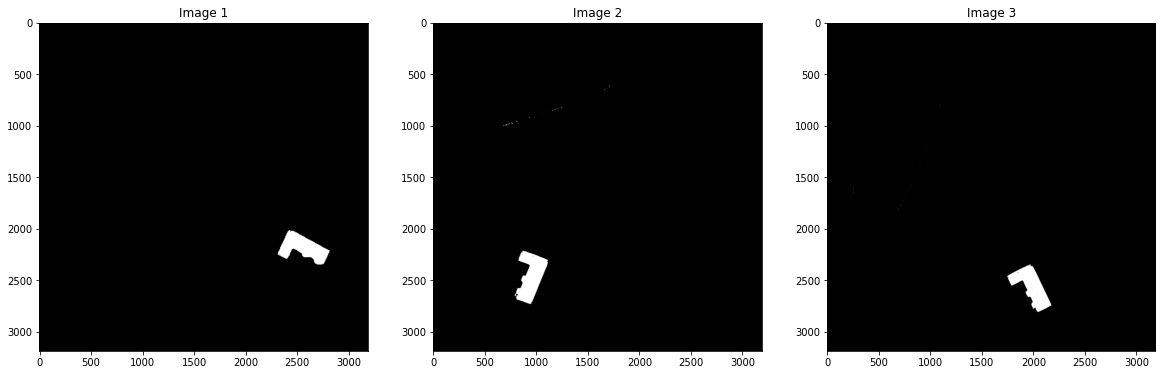

In [913]:
lower_obj2 = np.array([75, 35, 40])
upper_obj2 = np.array([180,90,80])

obj2_mask1 = cv2.inRange(img1, lower_obj2, upper_obj2)
obj2_mask2 = cv2.inRange(img2, lower_obj2, upper_obj2)
obj2_mask3 = cv2.inRange(img3, lower_obj2, upper_obj2)

plot_images(obj2_mask1,obj2_mask2,obj2_mask3)

Masks object 3

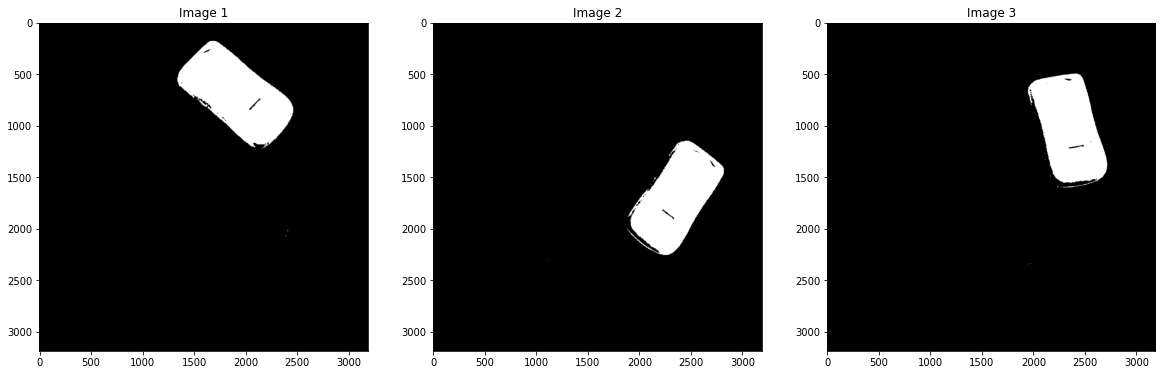

In [914]:
lower_obj3 = np.array([141, 100, 0])
upper_obj3 = np.array([260,255,240])

obj3_mask1 = cv2.inRange(img1, lower_obj3, upper_obj3)
obj3_mask2 = cv2.inRange(img2, lower_obj3, upper_obj3)
obj3_mask3 = cv2.inRange(img3, lower_obj3, upper_obj3)

plot_images(obj3_mask1,obj3_mask2,obj3_mask3)

Masks applied on each of the images

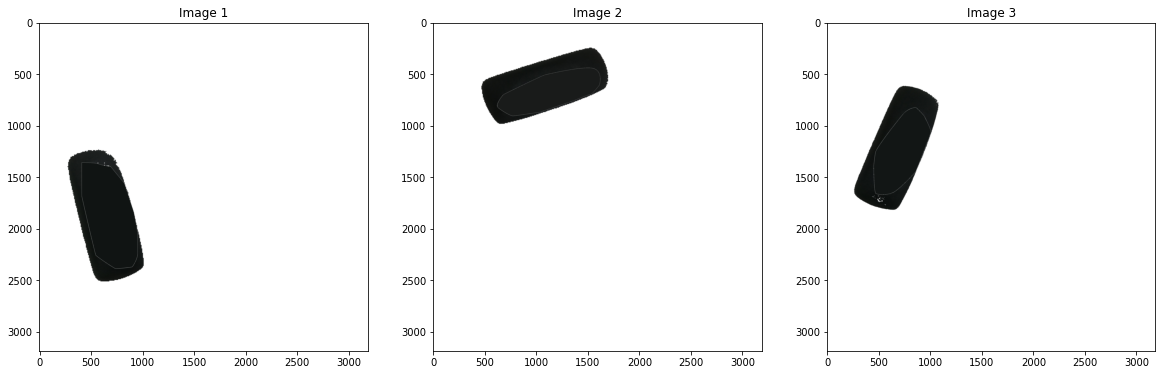

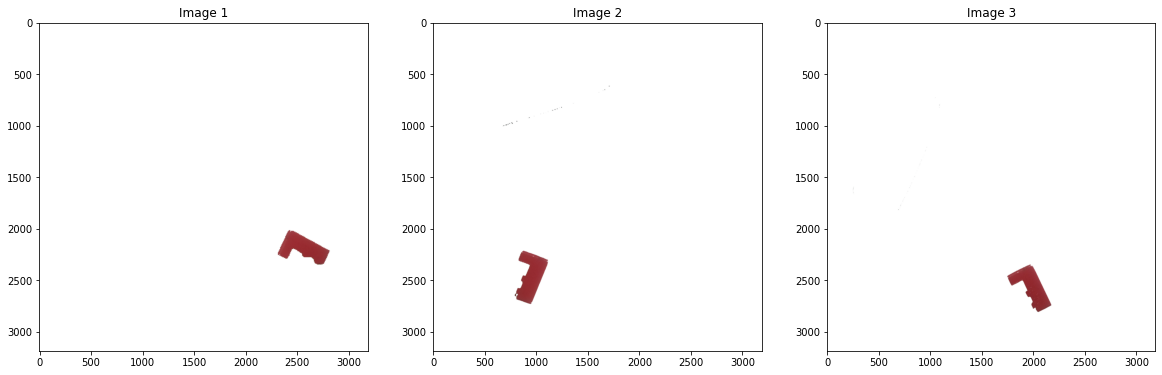

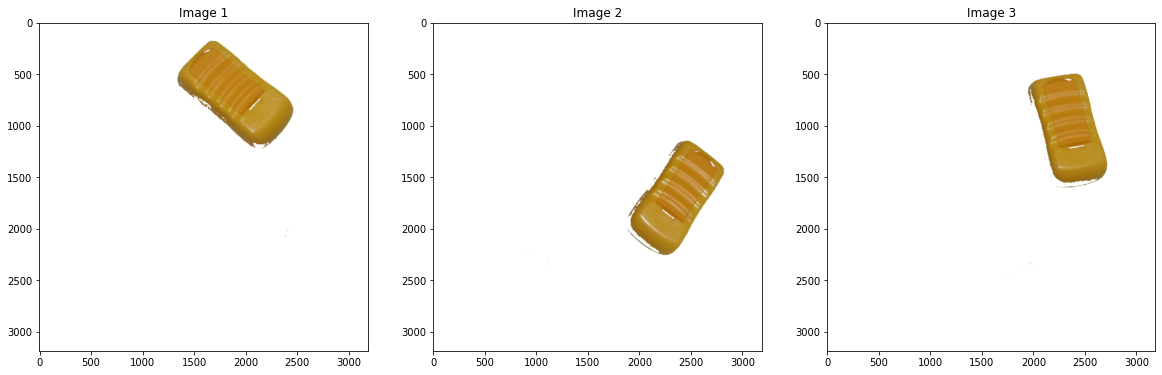

In [915]:
plot_mask(obj1_mask1, obj1_mask2, obj1_mask3)
plot_mask(obj2_mask1, obj2_mask2, obj2_mask3)
plot_mask(obj3_mask1, obj3_mask2, obj3_mask3)

# Exercise 4

## Textures are added 

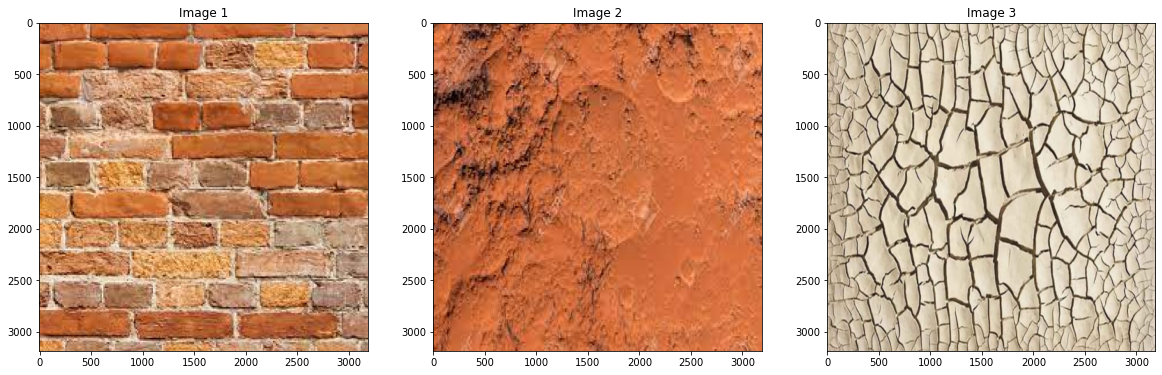

In [916]:
texture1 = cv2.imread('VisionTest/ObjectDetection/texture4.jpeg')
texture2 = cv2.imread('VisionTest/ObjectDetection/texture2.jpeg')
texture3 = cv2.imread('VisionTest/ObjectDetection/texture3.jpg')

texture1 = cv2.cvtColor(texture1,cv2.COLOR_BGR2RGB)
texture2 = cv2.cvtColor(texture2,cv2.COLOR_BGR2RGB)
texture3 = cv2.cvtColor(texture3,cv2.COLOR_BGR2RGB)

texture1 = cv2.resize(texture1, (3186, 3186), interpolation = cv2.INTER_AREA)
texture2 = cv2.resize(texture2, (3186, 3186), interpolation = cv2.INTER_AREA)
texture3 = cv2.resize(texture3, (3186, 3186), interpolation = cv2.INTER_AREA)

plot_images(texture1,texture2,texture3)

## Function to use the texture as a mask

In [917]:
def texture_plot_mask(obj_mask1, obj_mask2, obj_mask3, texture):
  tx_1 = np.copy(texture)
  tx_2 = np.copy(texture)
  tx_3 = np.copy(texture)

  tx_1[obj_mask1 != 255] = [0, 0, 0]
  tx_2[obj_mask2 != 255] = [0, 0, 0]
  tx_3[obj_mask3 != 255] = [0, 0, 0]
  # plt.imshow(tx_1, cmap='gray')

  f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))
  ax1.set_title('Image 1')
  ax1.imshow(tx_1, cmap='gray')
  ax2.set_title('Image 2')
  ax2.imshow(tx_2, cmap='gray')
  ax3.set_title('Image 3')
  ax3.imshow(tx_3, cmap='gray')

### Mask 1 is plotted with object 1

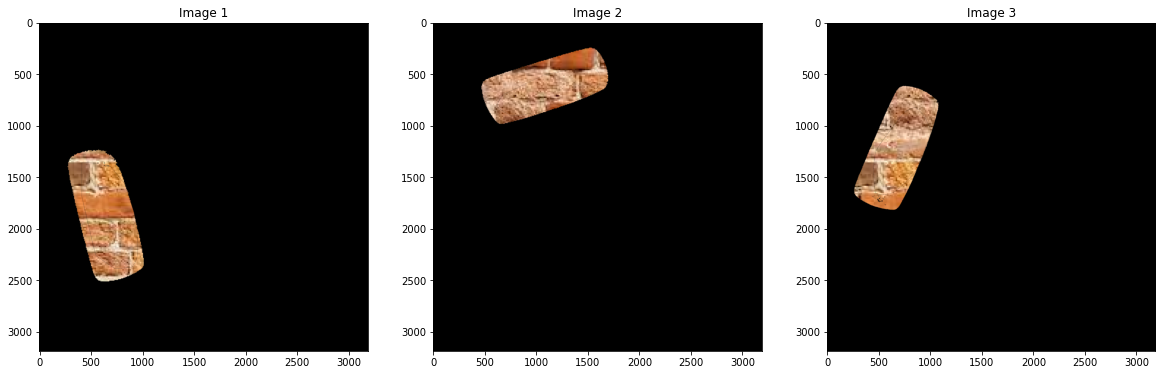

In [918]:
texture_plot_mask(obj1_mask1, obj1_mask2, obj1_mask3, texture1)

### Mask 2 is plotted with object 2

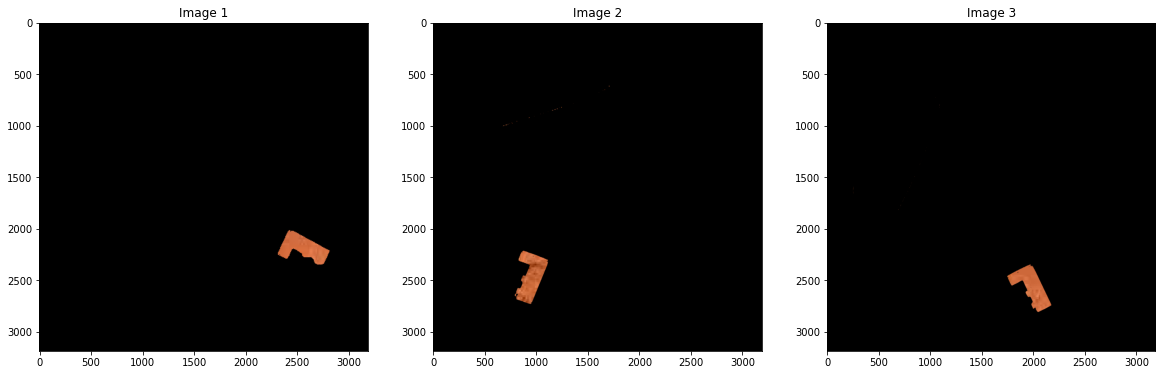

In [919]:
texture_plot_mask(obj2_mask1, obj2_mask2, obj2_mask3, texture2)

### Mask 3 is plotted with object 3

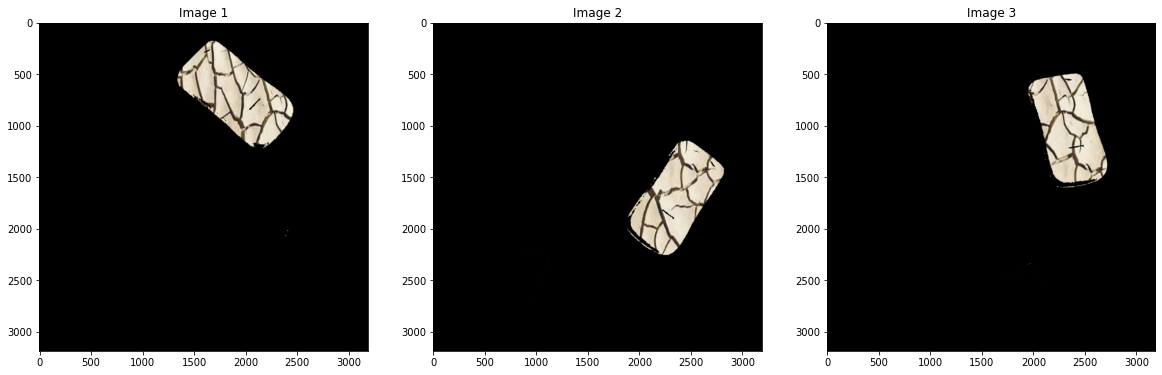

In [920]:
texture_plot_mask(obj3_mask1, obj3_mask2, obj3_mask3, texture3)